# 얼굴 검출하기

In [136]:
import matplotlib.pyplot as plt
import cv2

In [137]:
# 캐스 케이드 파일 지정해서 검출기 생성
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

In [138]:
# 이미지를 읽어들이고 그레이 스케일로 변환하기
img = cv2.imread("team.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [139]:
# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(130, 130))

In [140]:
# 결과 확인하기
if len(face_list) == 0:
    print("실패")
    quit()


In [141]:
#인식한 부분 표시하기
for(x, y, w, h) in face_list:
    print("얼굴좌표 = ", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)
    

얼굴좌표 =  265 249 144 144
얼굴좌표 =  226 506 151 151
얼굴좌표 =  1142 257 142 142
얼굴좌표 =  929 491 170 170


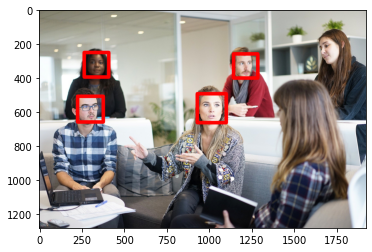

In [142]:
# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 모자이크 하기

In [143]:
# 모자이크 함수 만들기
import cv2

def mosaic(img, rect, size):
    #모자이크 적용 부분 추출
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    #축소하기 확대하기
    i_small = cv2.resize(i_rect, (size,size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    #모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    #print(img2)
    return img2

In [144]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어들이고 모자이크 처리하기
img = cv2.imread("team.jpg")
mos = mosaic(img, (50, 50, 1000, 1000), 10)

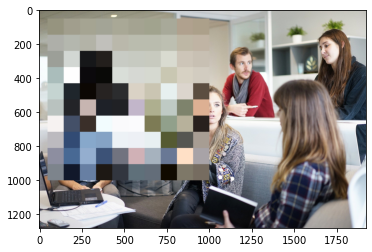

In [145]:

# 이미지 출력하기
cv2.imwrite("mosaic-test.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

# 사람 얼굴에 자동으로 모자이크 처리하기

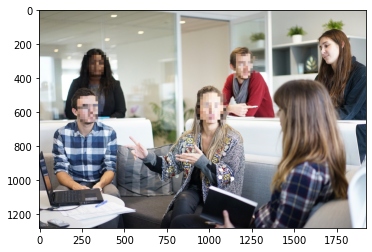

In [151]:
import matplotlib.pyplot as plt
import cv2

# 캐스 케이드 파일 지정해서 검출기 생성
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어들이고 그레이 스케일로 변환하기
img = cv2.imread("team.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(130, 130))
if len(face_list) == 0: quit()
    
# 인식한 부분 모자이크 처리하기
for(x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
    
# 이미지 출력하기
cv2.imwrite("team-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


# 회전 검출 테스트

---0---
얼굴좌표 =  265 249 144 144
얼굴좌표 =  226 506 151 151
얼굴좌표 =  1142 257 142 142
얼굴좌표 =  929 491 170 170
---10---
얼굴좌표 =  322 779 145 145
얼굴좌표 =  321 522 141 141
얼굴좌표 =  1013 639 173 173
---20---
얼굴좌표 =  1059 769 171 171
---30---
---40---
---50---
---60---
---70---
---80---


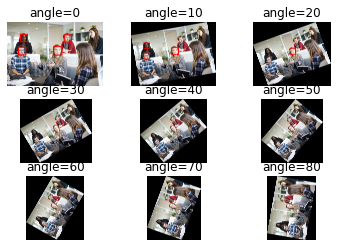

In [156]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 캐스 케이드 파일 지정해서 검출기 생성
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어들이기
img = cv2.imread("team.jpg")

# 얼굴 검출하고 영역 표시하는 함수
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(130, 130))
    # 인식한 영역 표시하기
    for(x, y, w, h) in face_list:
        print("얼굴좌표 = ", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 여러 각도 이미지 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---"+str(ang)+"---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i+1)
    plt.axis("off")
    plt.title("angle="+str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))